In [1]:
import pandas as pd
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

计算模型预测准确率

In [2]:
features = ['Capitalization', 'CirculatingCap','CirculatingMarketCap', 'MarketCap', 'PBRatio', 'PCFRatio', 'PSRatio','PeRatio', 'PeRatioLYR', 'TurnoverRatio']

In [3]:
monthly_acc = {}

In [4]:
for year in [2015, 2016, 2017, 2018, 2019, 2020, 2021]:
    test_data = pd.read_csv(f"../stock_data/train_data/{year}.csv", index_col="index")
    test_data_sorted = test_data.sort_values(by = "rf", ascending=False)
    long_set_test = test_data_sorted.iloc[:int(test_data_sorted.shape[0]*0.3), :]
    long_set_test["rf"] = 2
    plain_set_test = test_data_sorted.iloc[int(test_data_sorted.shape[0]*0.3):int(test_data_sorted.shape[0]*0.7), :]
    plain_set_test["rf"] = 1
    short_set_test = test_data_sorted.iloc[int(test_data_sorted.shape[0]*0.7):, :]
    short_set_test["rf"] = 0
    test_data =long_set_test.append(plain_set_test).append(short_set_test)
    X_test = test_data[features]
    y_test = test_data["rf"]

    xgb_clf = xgb.Booster()
    xgb_clf.load_model(f"../model/model_set/xgb-{year-5}-{year-1}.json")
    mons = [str(year) + x for x in ['-01','-02','-03','-04','-05','-06','-07','-08','-09','-10','-11','-12']]
    mons_predict = test_data.groupby("time")
    for mon in mons:
        mon_data = mons_predict.get_group(mon)
        X_test = mon_data[features]
        y_test = mon_data["rf"]
        dtest = xgb.DMatrix(X_test, feature_names=features)
        y_pred = xgb_clf.predict(dtest)
        monthly_acc[list(mon_data["time"])[0]] = round(accuracy_score(y_test,y_pred), 3)

/tmp/ipykernel_3397/3171551239.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_set_test["rf"] = 2
/tmp/ipykernel_3397/3171551239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plain_set_test["rf"] = 1
/tmp/ipykernel_3397/3171551239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [5]:
monthly_acc

{'2015-01': 0.532,
 '2015-02': 0.422,
 '2015-03': 0.432,
 '2015-04': 0.248,
 '2015-05': 0.368,
 '2015-06': 0.349,
 '2015-07': 0.376,
 '2015-08': 0.464,
 '2015-09': 0.389,
 '2015-10': 0.42,
 '2015-11': 0.51,
 '2015-12': 0.342,
 '2016-01': 0.416,
 '2016-02': 0.403,
 '2016-03': 0.415,
 '2016-04': 0.362,
 '2016-05': 0.42,
 '2016-06': 0.43,
 '2016-07': 0.408,
 '2016-08': 0.495,
 '2016-09': 0.562,
 '2016-10': 0.35,
 '2016-11': 0.407,
 '2016-12': 0.417,
 '2017-01': 0.398,
 '2017-02': 0.466,
 '2017-03': 0.396,
 '2017-04': 0.36,
 '2017-05': 0.366,
 '2017-06': 0.387,
 '2017-07': 0.438,
 '2017-08': 0.498,
 '2017-09': 0.424,
 '2017-10': 0.387,
 '2017-11': 0.471,
 '2017-12': 0.393,
 '2018-01': 0.339,
 '2018-02': 0.353,
 '2018-03': 0.469,
 '2018-04': 0.456,
 '2018-05': 0.338,
 '2018-06': 0.435,
 '2018-07': 0.459,
 '2018-08': 0.521,
 '2018-09': 0.441,
 '2018-10': 0.353,
 '2018-11': 0.497,
 '2018-12': 0.351,
 '2019-01': 0.314,
 '2019-02': 0.298,
 '2019-03': 0.378,
 '2019-04': 0.399,
 '2019-05': 0.44,


每个回测区间中，模型在每个月的预测准确率

In [6]:
dates = list(monthly_acc.keys())
acc = list(monthly_acc.values())

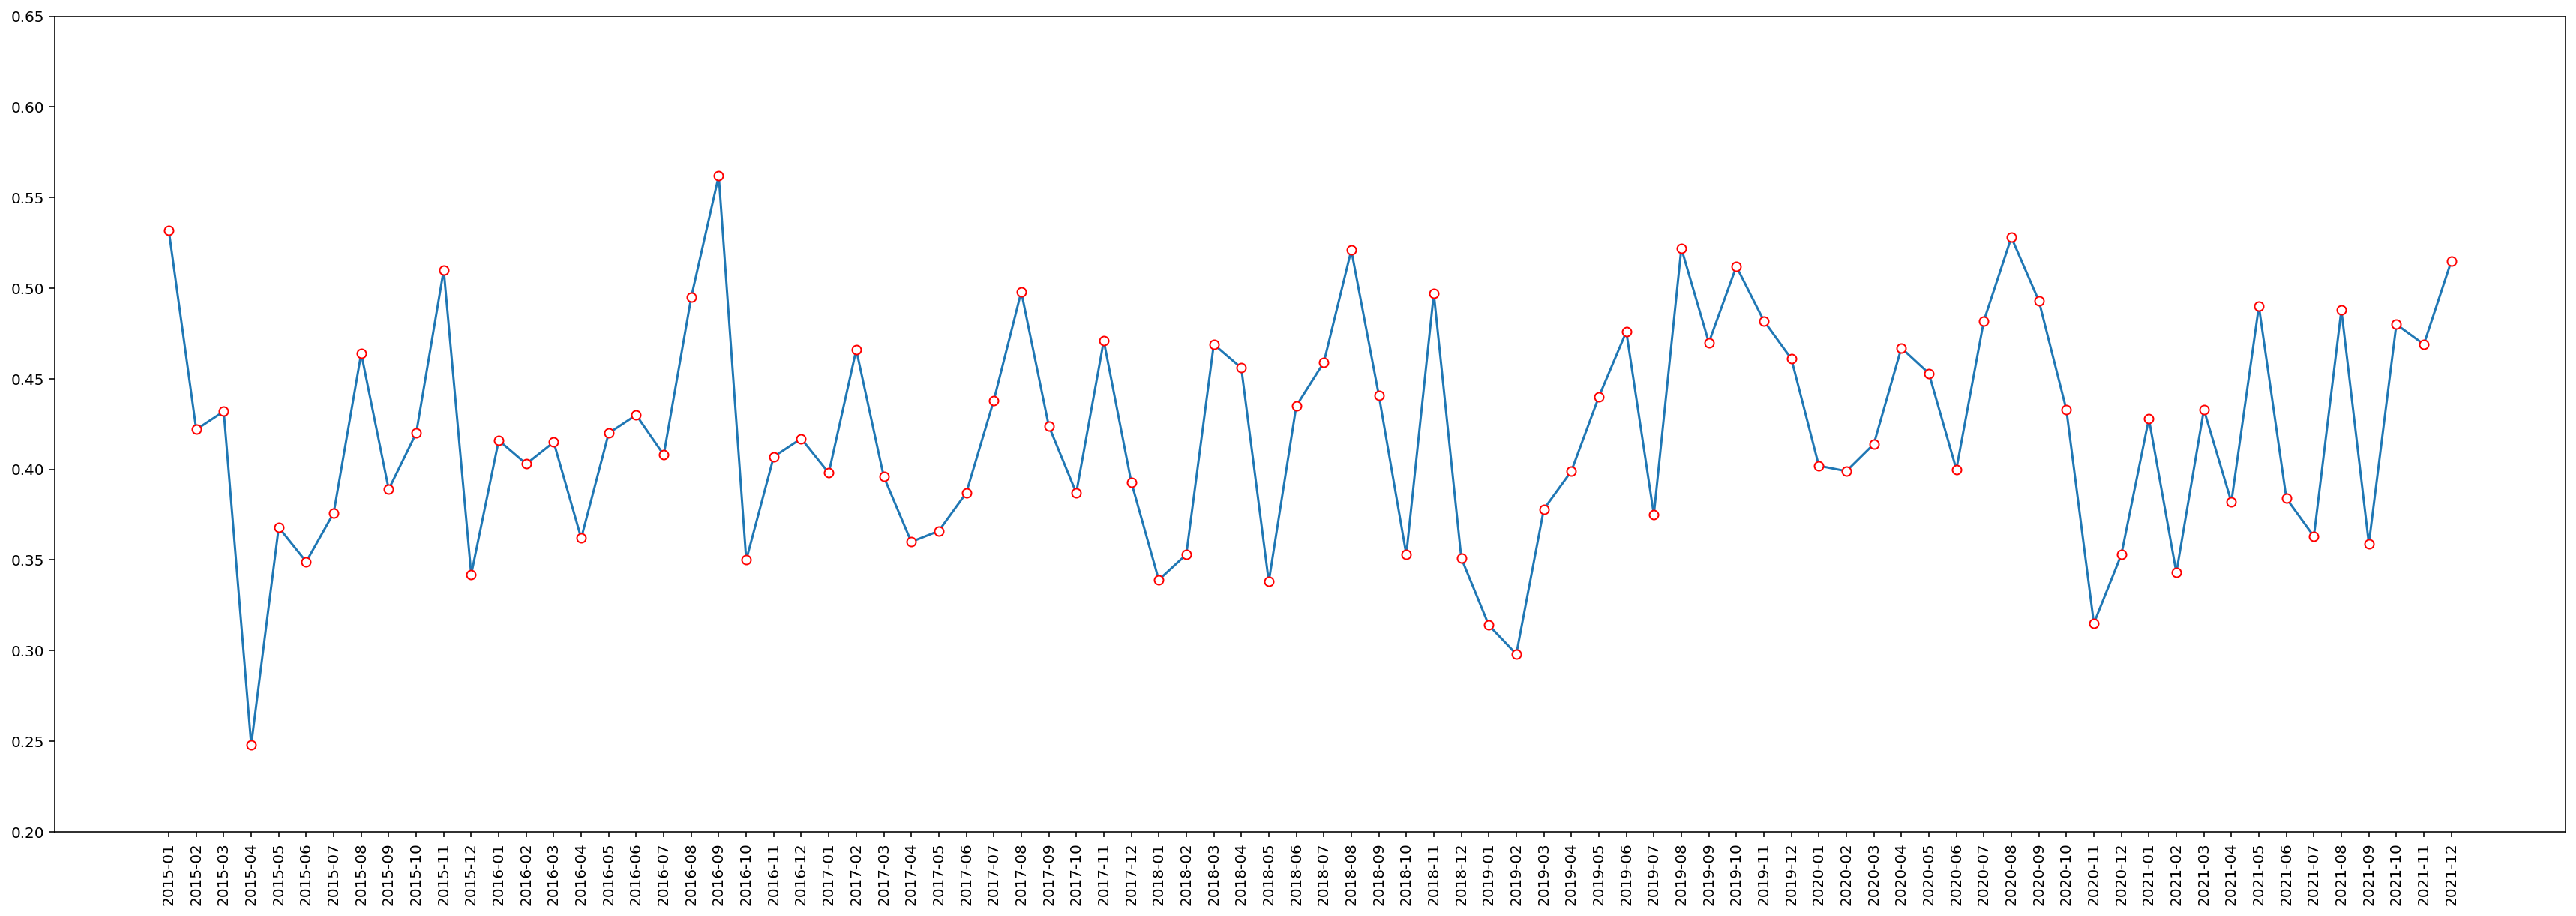

In [7]:
plt.figure( figsize=(30,10))
plt.ylim(0.2,0.65)
plt.xticks(fontsize=10, rotation = 90)
plt.plot(dates, acc, marker='o', mec='r', mfc='w',label='uniprot90_train')